In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [16]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

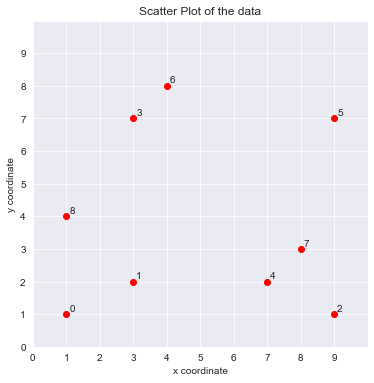

In [17]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

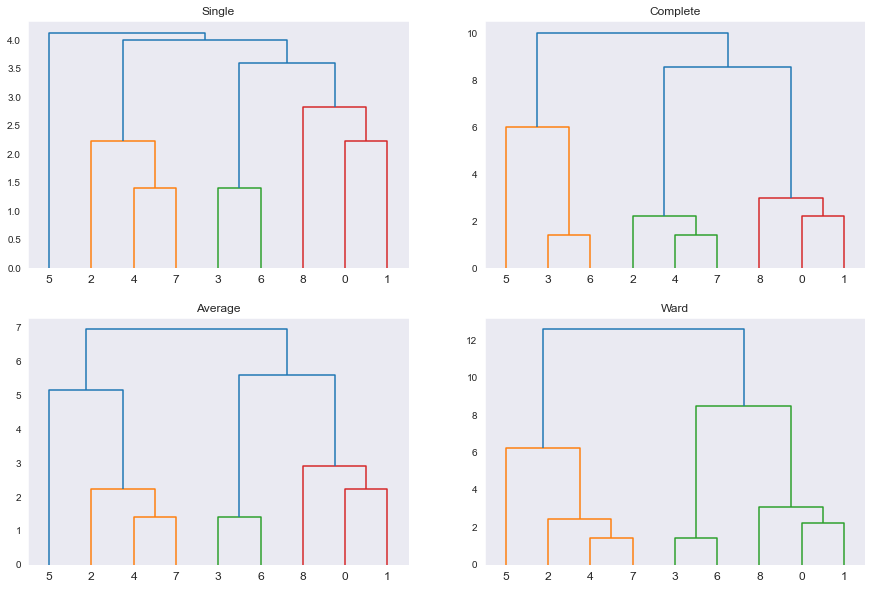

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


In [22]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


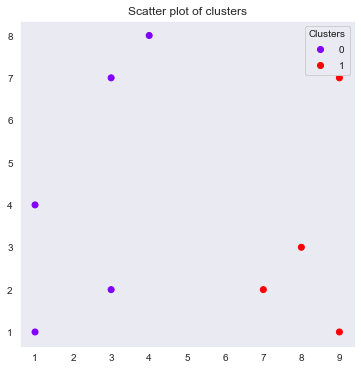

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()